# SHAKTI FEniCS code

The code requires [FEniCSx](https://fenicsproject.org). The notebook can be run 
through a [Docker](https://www.docker.com) container with the command:

`docker run --init -ti -p 8888:8888 -v $(pwd):/home/fenics/shared -w /home/fenics/shared dolfinx/lab:stable`

Various imports:

In [1]:
%load_ext autoreload
%autoreload 2
# add path to code
import sys
sys.path.insert(0, '../source')

from params import rho_i,g,H,X,Y
import numpy as np
import matplotlib.pyplot as plt

Set model options in main.py and then run the code: 

In [2]:
!rm -r results
!mpirun -np 2 python3 ../source/main.py

Load results:

In [3]:
b = np.load('./results/b.npy')
N = np.load('./results/N.npy')
qx = np.load('./results/qx.npy')
qy = np.load('./results/qy.npy')
t = np.load('./results/t.npy')

Save png's for movie:

In [4]:
!rm -r movie
!mkdir movie

# use agg backend for saving pngs
import matplotlib as mpl
mpl.use('agg')

# get water flow speed
q_m = np.sqrt(qx**2+qy**2)

j=0
ind = np.arange(0,t.size,1)
# %matplotlib inline
for i in ind:
    print('saved image '+str(j+1)+' out of '+str(ind.size)+' \r',end='')

    plt.figure(figsize=(12,5))
    plt.subplot(131)
    b_i = b[i,:,:]
    plt.contourf(X/1e3,Y/1e3,b_i,levels=np.linspace(0,0.1,100),cmap='Blues',extend='both')
    cbar = plt.colorbar(orientation='horizontal',ticks=np.linspace(0,0.1,6))
    cbar.set_label(r'$b$ (m)',fontsize=20)
    cbar.ax.tick_params(labelsize=12)
    plt.xlabel(r'$x$ (km)',fontsize=16)
    plt.ylabel(r'$y$ (km)',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.axis('equal')

    plt.subplot(132)
    N_i = N[i,:,:]
    plt.contourf(X/1e3,Y/1e3,N_i/(rho_i*g*H),levels=np.linspace(0,1,100),cmap='Blues_r',extend='both')
    cbar = plt.colorbar(orientation='horizontal',ticks=np.linspace(0,1,6))
    cbar.set_label(r'$N\,/\,p_\mathrm{i}$ (m)',fontsize=20)
    cbar.ax.tick_params(labelsize=12)
    plt.xlabel(r'$x$ (km)',fontsize=16)
    plt.xticks(fontsize=16)
    plt.gca().yaxis.set_ticklabels([])
    plt.axis('equal')

    plt.subplot(133)
    q_i = q_m[i,:,:]
    plt.contourf(X/1e3,Y/1e3,q_i,cmap='Blues',levels=np.linspace(0,0.5,100),extend='both')
    cbar = plt.colorbar(orientation='horizontal',ticks=np.linspace(0,0.5,6))
    cbar.set_label(r'$|\mathbf{q}|$ (m$^2$/s)',fontsize=20)
    cbar.ax.tick_params(labelsize=12)
    plt.gca().yaxis.set_label_position("right")
    plt.gca().yaxis.tick_right()
    plt.xlabel(r'$x$ (km)',fontsize=16)
    plt.ylabel(r'$y$ (km)',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.axis('equal')
    plt.savefig('./movie/'+str(j))
    # plt.show()
    plt.close()
    j+=1

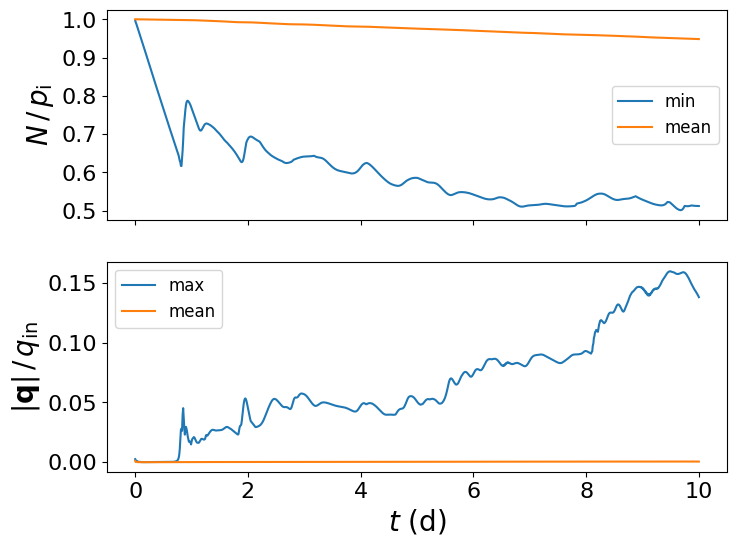

In [5]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.plot(t*365./3.154e7,np.min(N,axis=(1,2))/(rho_i*g*H),label=r'min')
plt.plot(t*365./3.154e7,np.mean(N,axis=(1,2))/(rho_i*g*H),label=r'mean')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r'$N\,/\,p_\mathrm{i}$',fontsize=20)
# plt.ylim(0.8,0.3)
plt.gca().xaxis.set_ticklabels([])
plt.legend(fontsize=12)
# plt.xlim(100,200)

plt.subplot(212)
plt.plot(t*365./3.154e7,np.max(q_m,axis=(1,2))/5.,label=r'max')
plt.plot(t*365./3.154e7,np.mean(q_m,axis=(1,2))/5.,label=r'mean')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r'$|\mathbf{q}|\,/\,q_\mathrm{in}$',fontsize=20)
plt.xlabel(r'$t$ (d)',fontsize=20)
plt.legend(fontsize=12)
plt.savefig('timeseries')
plt.show()
plt.close()